In [ ]:
# Predicting the future price of a stock using Facebook Prophet Model
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import to_datetime

In [ ]:
start_time = pd.to_datetime('2015-01-01')
end_time = pd.to_datetime('2022-03-01')
stock = ['ACN']
data_acn = yf.download(stock, start = start_time, end = end_time)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_acn.reset_index(inplace=True)
data_acn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,89.669998,90.089996,88.430000,88.839996,77.119675,2021300
1,2015-01-05,88.040001,88.320000,87.180000,87.339996,75.817581,3000000
2,2015-01-06,87.500000,87.769997,86.010002,86.709999,75.270676,2867000
3,2015-01-07,87.160004,88.750000,87.160004,88.529999,76.850571,2865500
4,2015-01-08,89.000000,90.150002,88.839996,89.879997,78.022476,2802900
...,...,...,...,...,...,...,...
1797,2022-02-22,320.010010,327.980011,317.790009,321.109985,315.078369,2794300
1798,2022-02-23,322.769989,324.820007,312.589996,313.160004,307.277710,2192200
1799,2022-02-24,302.350006,316.579987,300.709991,316.170013,310.231201,3785900
1800,2022-02-25,317.329987,323.170013,316.390015,322.510010,316.452148,2552600


In [ ]:
acn_open = data_acn.reset_index()['Open']
acn_open[len(acn_open)-20:]

1782    345.000000
1783    354.220001
1784    354.399994
1785    345.279999
1786    344.890015
1787    346.179993
1788    339.980011
1789    351.630005
1790    346.089996
1791    343.940002
1792    323.079987
1793    332.720001
1794    325.869995
1795    332.920013
1796    322.410004
1797    320.010010
1798    322.769989
1799    302.350006
1800    317.329987
1801    318.690002
Name: Open, dtype: float64

In [ ]:
data_acn01 = data_acn.drop(['Open','High','Low','Adj Close','Volume'], axis=1)
data_acn01

,Date,Close
0,2015-01-02,88.839996
1,2015-01-05,87.339996
2,2015-01-06,86.709999
3,2015-01-07,88.529999
4,2015-01-08,89.879997
...,...,...
1797,2022-02-22,321.109985
1798,2022-02-23,313.160004
1799,2022-02-24,316.170013
1800,2022-02-25,322.510010


In [ ]:
#getting the last 20 rows of data and store them into a new variable
last = data_acn01[len(data_acn01)-20:]
last

,Date,Close
1782,2022-01-31,353.579987
1783,2022-02-01,353.420013
1784,2022-02-02,359.470001
1785,2022-02-03,345.549988
1786,2022-02-04,347.500000
1787,2022-02-07,343.959991
1788,2022-02-08,345.070007
1789,2022-02-09,355.529999
1790,2022-02-10,342.390015
1791,2022-02-11,329.179993


In [ ]:
pred_dates01 = last['Date']
pred_dates = pred_dates01.tolist()

In [ ]:
actual_yhat = last['Close'].tolist()
actual_yhat

[353.5799865722656,
 353.4200134277344,
 359.4700012207031,
 345.54998779296875,
 347.5,
 343.9599914550781,
 345.07000732421875,
 355.5299987792969,
 342.3900146484375,
 329.17999267578125,
 326.1300048828125,
 329.4100036621094,
 333.7200012207031,
 322.9100036621094,
 321.17999267578125,
 321.1099853515625,
 313.1600036621094,
 316.1700134277344,
 322.510009765625,
 316.0199890136719]

In [ ]:
#getting all rows in the data set except for the last 20 rows of data
data_acn01 = data_acn01[:-20]
data_acn01

,Date,Close
0,2015-01-02,88.839996
1,2015-01-05,87.339996
2,2015-01-06,86.709999
3,2015-01-07,88.529999
4,2015-01-08,89.879997
...,...,...
1777,2022-01-24,339.000000
1778,2022-01-25,334.950012
1779,2022-01-26,329.890015
1780,2022-01-27,333.359985


In [ ]:
data_acn01 = data_acn01.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_acn01

,ds,y
0,2015-01-02,88.839996
1,2015-01-05,87.339996
2,2015-01-06,86.709999
3,2015-01-07,88.529999
4,2015-01-08,89.879997
...,...,...
1777,2022-01-24,339.000000
1778,2022-01-25,334.950012
1779,2022-01-26,329.890015
1780,2022-01-27,333.359985


In [ ]:
# import the fbprophet library
from prophet import Prophet
# create the prophet object (model)
fbp = Prophet(daily_seasonality = True)
fbp.fit(data_acn01)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2p8mfct/pektv4vz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2p8mfct/x448m5x9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85381', 'data', 'file=/tmp/tmpe2p8mfct/pektv4vz.json', 'init=/tmp/tmpe2p8mfct/x448m5x9.json', 'output', 'file=/tmp/tmpe2p8mfct/prophet_modelxjig3ky7/prophet_model-20230601142553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = fbp.make_future_dataframe(periods=365)
forecast = fbp.predict(future)

In [ ]:
# importing the plotting libraries
from prophet.plot import plot_plotly
#plot the data
plot_plotly(fbp, forecast)

In [ ]:
ax = forecast[['ds','yhat']]
ax

,ds,yhat
0,2015-01-02,97.594921
1,2015-01-05,95.991950
2,2015-01-06,95.555435
3,2015-01-07,94.706181
4,2015-01-08,94.344667
...,...,...
2142,2023-01-24,477.178161
2143,2023-01-25,477.226268
2144,2023-01-26,477.846341
2145,2023-01-27,478.177700


In [ ]:
yhat_pred = forecast[1793:1813]['yhat'].tolist()
yhat_pred

[375.297301848416,
 376.10759853283605,
 376.5323588502901,
 376.4715833411399,
 376.88321426277395,
 377.66179041405115,
 378.1227963901708,
 378.1530397620713,
 378.6464974189572,
 378.7475543920788,
 378.3620561452181,
 378.4536108654035,
 378.92214154002914,
 379.088141601741,
 378.8429694096226,
 379.0846242842494,
 378.96092856963804,
 378.3805375180968,
 378.30921398630056,
 378.64836782542994]

In [ ]:
actual_yhat

[353.5799865722656,
 353.4200134277344,
 359.4700012207031,
 345.54998779296875,
 347.5,
 343.9599914550781,
 345.07000732421875,
 355.5299987792969,
 342.3900146484375,
 329.17999267578125,
 326.1300048828125,
 329.4100036621094,
 333.7200012207031,
 322.9100036621094,
 321.17999267578125,
 321.1099853515625,
 313.1600036621094,
 316.1700134277344,
 322.510009765625,
 316.0199890136719]

In [ ]:
# rounding off the values upto 2 decimal places
L_actual=[]
for i in range(len(actual_yhat)):
  L_actual.append(round(actual_yhat[i], 3))
L_pred=[]
for i in range(len(yhat_pred)):
  L_pred.append(round(yhat_pred[i], 3))

In [ ]:
## applying the Profit-signal algorithm
pnl_signal=[]
for i in range(len(L_pred)-1):
  x1 = L_pred[i+1] - L_actual[i]
  x2 = L_actual[i+1] - L_actual[i]
  x3 = L_actual[i]
  P = ((x1 * x2)/x3)
  pnl = np.sign(P)
  if pnl == 1.0 or pnl==1.00:
    print(f"The signal is to : BUY :{pnl}")
  else :
    print(f"The signal is to : SELL :{pnl}")
  pnl_signal.append(pnl)

The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : SELL :-1.0
The signal is to : BUY :1.0
The signal is to : BUY :1.0
The signal is to : SELL :-1.0


In [ ]:
actual_open = acn_open[len(acn_open)-20:].tolist()

In [ ]:
L_open=[]
for i in range(len(actual_open)):
  L_open.append(round(actual_open[i], 3))

In [ ]:
# profit calculation
profit_calc=[]
for i in range(len(pnl_signal)):
  y1 = L_actual[i] - L_open[i]
  y2 = pnl_signal[i]
  profit = y2 * y1
  if pnl_signal[i] == 1.0 :
    print(f"The signal is : BUY :{pnl}, since profit :{profit}")
  elif pnl_signal[i] == -1.0:
    print(f"The signal is : SELL :{pnl}, since loss :{profit}")
  profit_calc.append(profit)

The signal is : SELL :-1.0, since loss :-8.579999999999984
The signal is : BUY :-1.0, since profit :-0.8000000000000114
The signal is : SELL :-1.0, since loss :-5.07000000000005
The signal is : BUY :-1.0, since profit :0.27000000000003865
The signal is : SELL :-1.0, since loss :-2.6100000000000136
The signal is : BUY :-1.0, since profit :-2.2200000000000273
The signal is : BUY :-1.0, since profit :5.089999999999975
The signal is : SELL :-1.0, since loss :-3.8999999999999773
The signal is : SELL :-1.0, since loss :3.6999999999999886
The signal is : SELL :-1.0, since loss :14.759999999999991
The signal is : BUY :-1.0, since profit :3.0500000000000114
The signal is : BUY :-1.0, since profit :-3.3100000000000023
The signal is : SELL :-1.0, since loss :-7.850000000000023
The signal is : SELL :-1.0, since loss :10.009999999999991
The signal is : SELL :-1.0, since loss :1.2300000000000182
The signal is : SELL :-1.0, since loss :-1.1000000000000227
The signal is : BUY :-1.0, since profit :-9.6

In [ ]:
zero_L=[]
for i in range(20):
  zero_L.append(0)

In [ ]:
len(profit_calc)

19

In [ ]:
# Cumulative Profit Calculation
cumu_pft= 0
for i in range(19):
  cumu_pft = cumu_pft+profit_calc[i]

In [ ]:
print("The Cumulative Profit for the test dataset is : ", cumu_pft)

The Cumulative Profit for the test dataset is :  1.6999999999999318


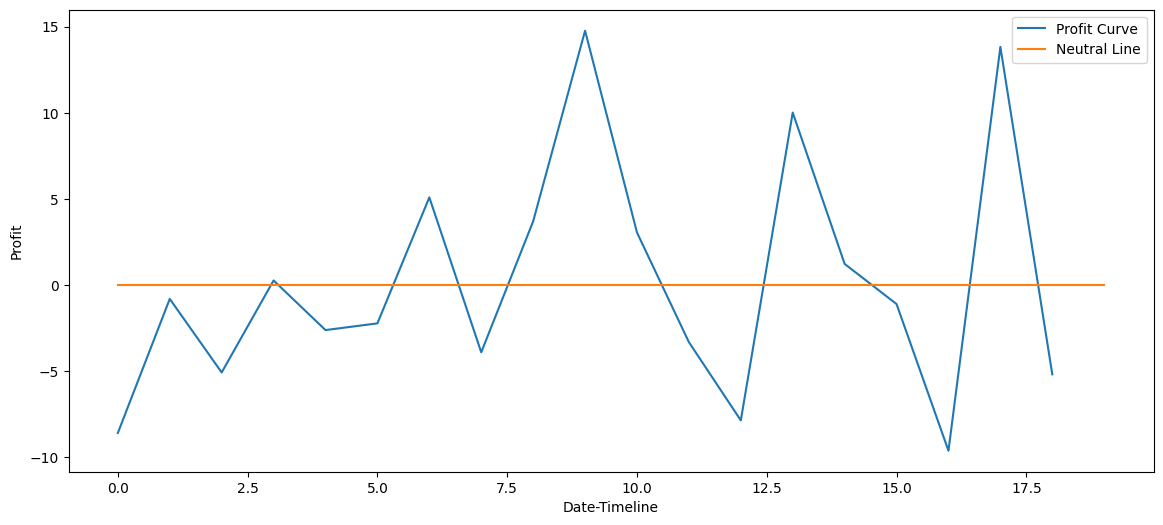

In [ ]:
# plotting the profit curve
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)
plt.xlabel('Date-Timeline')
plt.ylabel('Profit')
plt.plot(profit_calc) 
plt.plot(zero_L)
plt.legend(["Profit Curve","Neutral Line"])